In [1]:
from ioos_model_comparisons.platforms import get_glider_by_id

In [2]:
# glider id from the national glider dac
glider = "ng645-20210613T0000"
df = get_glider_by_id(glider)
df.head()

,longitude (degrees_east),latitude (degrees_north),pressure (decibar),depth (m),temperature (degrees_C),salinity (1),conductivity (mS cm-1),density (kg m-3)
time (UTC),,,,,,,,
2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [3]:
# Reset the index so we can rename all the columns to easier variable names
df = df.reset_index()
df.head()

,time (UTC),longitude (degrees_east),latitude (degrees_north),pressure (decibar),depth (m),temperature (degrees_C),salinity (1),conductivity (mS cm-1),density (kg m-3)
0,2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
1,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2,2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
3,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
4,2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [4]:
# Rename all the variables
df = df.rename({
    "time (UTC)": "time",
    "longitude (degrees_east)": "lon",
    "latitude (degrees_north)": "lat",
    "pressure (decibar)": "pressure",
    "temperature (degrees_C)": "temperature",
    "depth (m)": "depth",
    "salinity (1)": "salinity",
    "conductivity (mS cm-1)": "conductivity",
    "density (kg m-3)": "density",
}, axis=1)
df.head()

,time,lon,lat,pressure,depth,temperature,salinity,conductivity,density
0,2021-06-13 04:26:50,-94.591942,27.643408,0.279798,0.277945,29.0704,31.186760,51.763603,1019.18286
1,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0598,31.188139,51.755400,1019.18700
2,2021-06-13 04:26:50,-94.591942,27.643408,0.139899,0.138972,29.0657,31.188772,51.762000,1019.18536
3,2021-06-13 04:26:50,-94.591942,27.643408,0.189863,0.188605,29.0679,31.189420,51.765100,1019.18530
4,2021-06-13 04:26:50,-94.591942,27.643408,0.259812,0.258092,29.0700,31.188171,51.765297,1019.18396


In [8]:
from ioos_model_comparisons.calc import depth_interpolate

# Groupby 'time' and apply the your choice of depth gridding: depth_bin or depth_interpolate.
# It will use the defaults for those functions
df_interp = df.groupby(['time']).apply(depth_interpolate, depth_var='depth', depth_min=0, depth_max=100, stride=1)
df_interp

depth        lon        lat    pressure  temperature  \
time                                                                            
2021-06-13 04:26:50 0        0 -94.591942  27.643408    0.139899    29.065700   
                    1        1 -94.591942  27.643408    0.914339    29.072550   
                    2        2 -94.591942  27.643408    1.883638    29.040300   
                    3        3 -94.591942  27.643408    3.360903    28.726400   
                    4        4 -94.591942  27.643408    3.703989    28.619700   
...                        ...        ...        ...         ...          ...   
2021-09-24 14:39:05 96      96 -88.167206  29.205790   97.163750    19.096567   
                    97      97 -88.167206  29.205790   97.735850    19.053933   
                    98      98 -88.167206  29.205790   98.883375    18.967267   
                    99      99 -88.167206  29.205790   99.458800    18.923233   
                    100    100 -88.167206  29.205790  100.897362    18.835600   

                          salinity  conductivity      density  
time                                                           
2021-06-13 04:26:50 0    31.188772     51.762000  1019.185360  
                    1    31.184723     51.762900  1019.183350  
                    2    31.176625     51.720250  1019.192135  
                    3    31.577736     52.004769  1019.602640  
                    4    32.004633     52.526234  1019.959250  
...                            ...           ...          ...  
2021-09-24 14:39:05 96   36.504199     48.836767  1026.574067  
                    97   36.507867     48.796733  1026.590433  
                    98   36.505933     48.704233  1026.616400  
                    99   36.500331     48.651767  1026.626000  
                    100  36.490879     48.549549  1026.647700  

[105949 rows x 8 columns]

In [9]:
# Reset the index again so that we can drop the nameless second multi-index
df_interp = df_interp.reset_index().drop(['level_1'], axis=1)
df_interp

,time,depth,lon,lat,pressure,temperature,salinity,conductivity,density
0,2021-06-13 04:26:50,0,-94.591942,27.643408,0.139899,29.065700,31.188772,51.762000,1019.185360
1,2021-06-13 04:26:50,1,-94.591942,27.643408,0.914339,29.072550,31.184723,51.762900,1019.183350
2,2021-06-13 04:26:50,2,-94.591942,27.643408,1.883638,29.040300,31.176625,51.720250,1019.192135
3,2021-06-13 04:26:50,3,-94.591942,27.643408,3.360903,28.726400,31.577736,52.004769,1019.602640
4,2021-06-13 04:26:50,4,-94.591942,27.643408,3.703989,28.619700,32.004633,52.526234,1019.959250
...,...,...,...,...,...,...,...,...,...
105944,2021-09-24 14:39:05,96,-88.167206,29.205790,97.163750,19.096567,36.504199,48.836767,1026.574067
105945,2021-09-24 14:39:05,97,-88.167206,29.205790,97.735850,19.053933,36.507867,48.796733,1026.590433
105946,2021-09-24 14:39:05,98,-88.167206,29.205790,98.883375,18.967267,36.505933,48.704233,1026.616400
105947,2021-09-24 14:39:05,99,-88.167206,29.205790,99.458800,18.923233,36.500331,48.651767,1026.626000


In [12]:
# Set a multi-index with 'time' and 'depth.
df_interp = df_interp.set_index(['time', 'depth'])
# df_interp = df_interp.reset_index()
df_interp

lon        lat    pressure  temperature  \
time                depth                                                  
2021-06-13 04:26:50 0     -94.591942  27.643408    0.139899    29.065700   
                    1     -94.591942  27.643408    0.914339    29.072550   
                    2     -94.591942  27.643408    1.883638    29.040300   
                    3     -94.591942  27.643408    3.360903    28.726400   
                    4     -94.591942  27.643408    3.703989    28.619700   
...                              ...        ...         ...          ...   
2021-09-24 14:39:05 96    -88.167206  29.205790   97.163750    19.096567   
                    97    -88.167206  29.205790   97.735850    19.053933   
                    98    -88.167206  29.205790   98.883375    18.967267   
                    99    -88.167206  29.205790   99.458800    18.923233   
                    100   -88.167206  29.205790  100.897362    18.835600   

                            salinity  conductivity      density  
time                depth                                        
2021-06-13 04:26:50 0      31.188772     51.762000  1019.185360  
                    1      31.184723     51.762900  1019.183350  
                    2      31.176625     51.720250  1019.192135  
                    3      31.577736     52.004769  1019.602640  
                    4      32.004633     52.526234  1019.959250  
...                              ...           ...          ...  
2021-09-24 14:39:05 96     36.504199     48.836767  1026.574067  
                    97     36.507867     48.796733  1026.590433  
                    98     36.505933     48.704233  1026.616400  
                    99     36.500331     48.651767  1026.626000  
                    100    36.490879     48.549549  1026.647700  

[105949 rows x 7 columns]

In [13]:
# The df.to_xarray() method will automatically convert all the multi-indexes to the appropriate dimensions in your xarray dataset
ds = df_interp.to_xarray()
ds

<xarray.Dataset>
Dimensions:       (time: 1049, depth: 101)
Coordinates:
  * time          (time) datetime64[ns] 2021-06-13T04:26:50 ... 2021-09-24T14...
  * depth         (depth) int64 0 1 2 3 4 5 6 7 8 ... 93 94 95 96 97 98 99 100
Data variables:
    lon           (time, depth) float64 -94.59 -94.59 -94.59 ... -88.17 -88.17
    lat           (time, depth) float64 27.64 27.64 27.64 ... 29.21 29.21 29.21
    pressure      (time, depth) float64 0.1399 0.9143 1.884 ... 99.46 100.9
    temperature   (time, depth) float64 29.07 29.07 29.04 ... 18.97 18.92 18.84
    salinity      (time, depth) float64 31.19 31.18 31.18 ... 36.51 36.5 36.49
    conductivity  (time, depth) float64 51.76 51.76 51.72 ... 48.7 48.65 48.55
    density       (time, depth) float64 1.019e+03 1.019e+03 ... 1.027e+03

In [17]:
# Resample the data to 24 hours.
tds = ds.resample(time='24H').interpolate('linear')
tds

<xarray.Dataset>
Dimensions:       (depth: 100, time: 104)
Coordinates:
  * depth         (depth) float64 0.0 1.0 2.0 3.0 4.0 ... 96.0 97.0 98.0 99.0
  * time          (time) datetime64[ns] 2021-06-13 2021-06-14 ... 2021-09-24
Data variables:
    lon           (time, depth) float64 nan nan nan nan ... -88.11 nan -88.11
    lat           (time, depth) float64 nan nan nan nan ... nan 29.2 nan 29.2
    pressure      (time, depth) float64 nan nan nan nan ... nan 98.06 nan 99.84
    temperature   (time, depth) float64 nan nan nan nan ... nan 18.82 nan 18.74
    salinity      (time, depth) float64 nan nan nan nan ... nan 36.5 nan 36.49
    conductivity  (time, depth) float64 nan nan nan nan ... nan 48.54 nan 48.44
    density       (time, depth) float64 nan nan nan ... 1.027e+03 nan 1.027e+03

(100.0, 0.0)

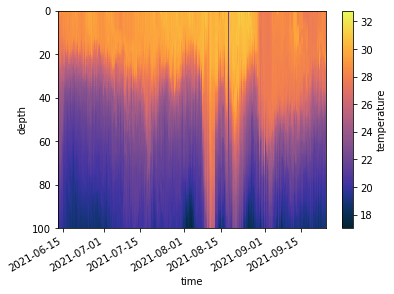

In [15]:
import matplotlib.pyplot as plt
import cmocean as cm

ax = ds.temperature.plot(x='time', cmap=cm.cm.thermal)
plt.ylim([100, 0])